In [247]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [248]:
churn_data = pd.read_csv('D:\Skillfactory\Визуализация данных\churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [249]:
data111 = churn_data.loc[:, ["CustomerId",	"Surname", "CreditScore",	"Geography", "Gender",	"Age",	"Tenure",	"Balance",	"NumOfProducts" , "HasCrCard",	"IsActiveMember",	"EstimatedSalary",	"Exited"]]
display(data111.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

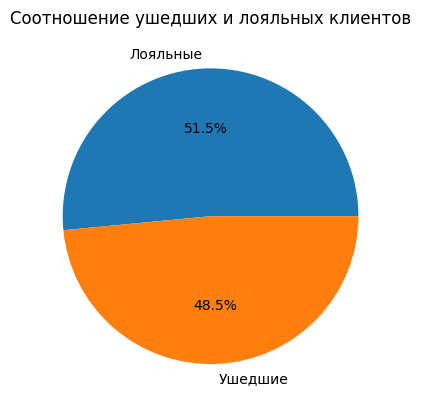

In [250]:
active = churn_data[churn_data['IsActiveMember']==1]['IsActiveMember'].count()
inactive = churn_data[churn_data['IsActiveMember']==0]['IsActiveMember'].count()
plt.pie([active, inactive], labels=['Лояльные', 'Ушедшие'], autopct='%1.1f%%')
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()

На круговой диаграме видно что лояльных клиентов немного больше чем ушедших

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

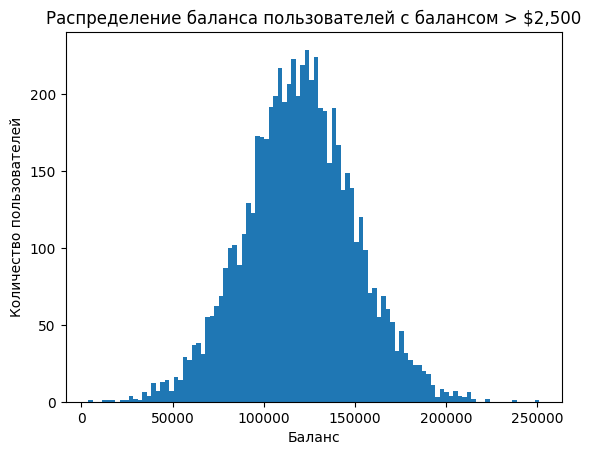

In [251]:
balance_users = data111[data111['Balance'] > 2500]


plt.hist(balance_users['Balance'], bins=100)
plt.title('Распределение баланса пользователей с балансом > $2,500')
plt.xlabel('Баланс')
plt.ylabel('Количество пользователей')
plt.show()

Наибольшее кол-во людей у кого на счету > 2,500$, имеют сумму от 100000$ до 150000$

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

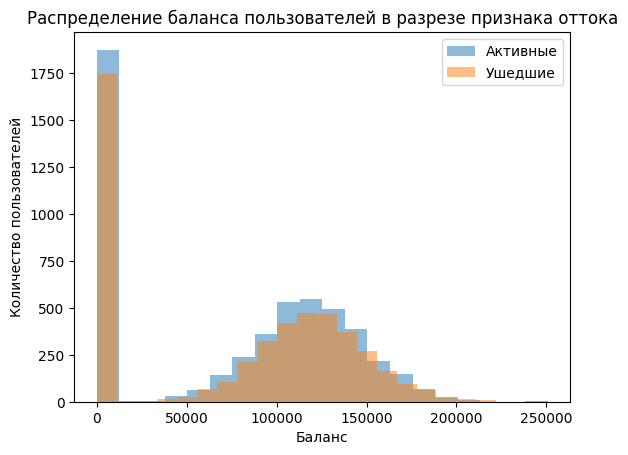

In [252]:

active = data111[data111['IsActiveMember'] == 1]
inactive = data111[data111['IsActiveMember'] == 0]

plt.hist(active['Balance'], bins=20, alpha=0.5, label='Активные')
plt.hist(inactive['Balance'], bins=20, alpha=0.5, label='Ушедшие')
plt.title('Распределение баланса пользователей в разрезе признака оттока')
plt.xlabel('Баланс')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()





у лояльных пользователей как правило суммы вложения выше, чем у пользователей, которые ушли. У большинства ушедших пользователей сумма вклада была меньше 25 тысяч долларов. Возможно уход клиентов связан с тем, что они не могли получить услуги, которые были им нужны (кредиты, ипотеки и т.д.), они могут решить перейти в другой банк. Возможно большинство клиентов ушло из-за недоверия к этому банку, не считали его надежным.


9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0, 0.5, 'Количество пользователей')

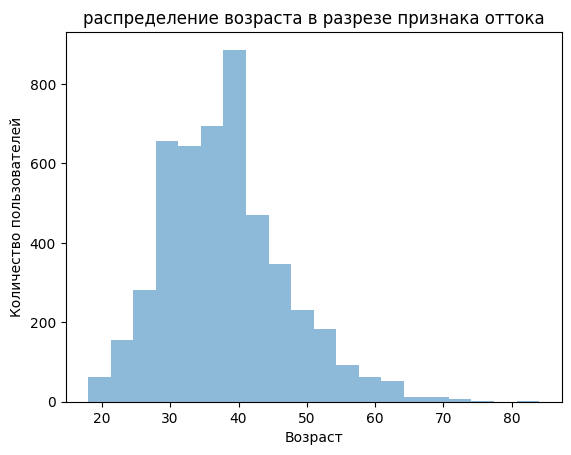

In [253]:
plt.hist(inactive['Age'], bins=20, alpha=0.5, label='Ушедшие')
plt.title('распределение возраста в разрезе признака оттока')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

Больше всего людей уходят из банка в возрасте с 29 до 41 года. Именно на эту возрастную группу стоит обратить внимание

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

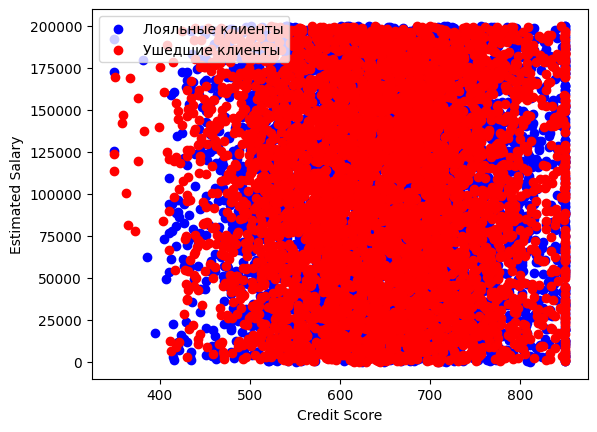

In [254]:

active = data111[data111['IsActiveMember'] == 1][['CreditScore', 'EstimatedSalary']]


inactive = data111[data111['IsActiveMember'] == 0][['CreditScore', 'EstimatedSalary']]

plt.scatter(active['CreditScore'], active['EstimatedSalary'], color='blue', label='Лояльные клиенты')
plt.scatter(inactive['CreditScore'], inactive['EstimatedSalary'], color='red', label='Ушедшие клиенты')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

 в целом кредитный рейтинг и предполагаемая зарплата клиента не сильно связаны между собой.

9.6Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

<BarContainer object of 2 artists>

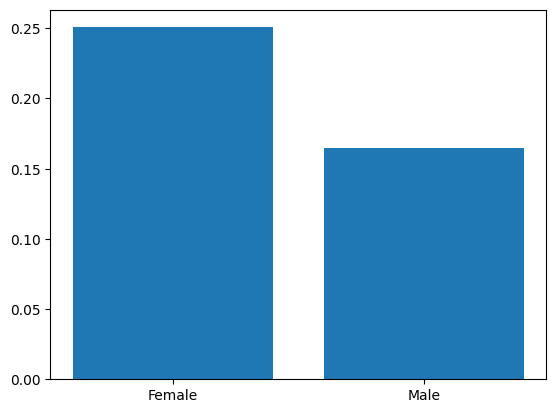

In [255]:

# группировка данных по полу и подсчет процента ушедших клиентов
gender = data111.groupby('Gender')['Exited'].mean()
display(gender)

names = [gender.index[0], gender.index[1]]
values = [gender.values[0], gender.values[1]]
plt.bar(names, values)

Женщины уходят чаще

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64

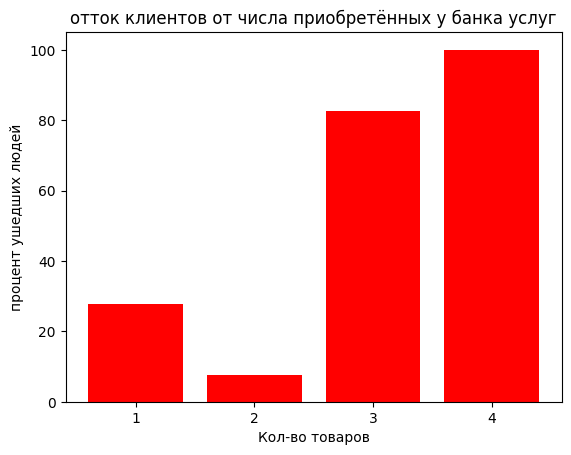

In [256]:

services_churn = data111.groupby('NumOfProducts')['Exited'].mean()
display(services_churn)


fig, ax = plt.subplots()
ax.bar(services_churn.index, services_churn.values * 100, color='red')
ax.set_xlabel('Кол-во товаров')
ax.set_xticks([1, 2, 3, 4])
ax.set_ylabel('процент ушедших людей')
ax.set_title('отток клиентов от числа приобретённых у банка услуг')



plt.show()


все кто приобрел 4 продукта ушли из банка

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

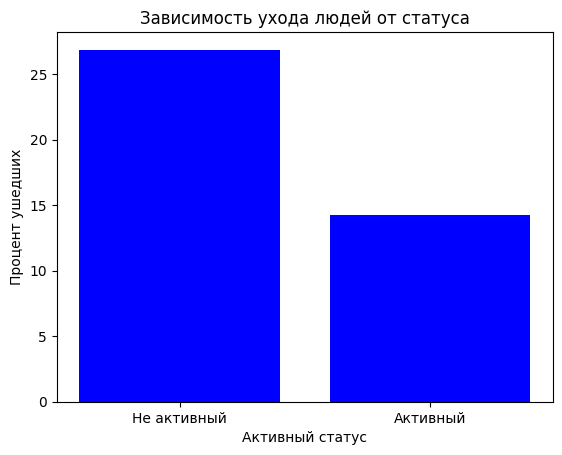

In [257]:

active = data111.groupby('IsActiveMember')['Exited'].mean()
display(active)
fig, ax = plt.subplots()
ax.bar(active.index, active.values*100, color='b')
ax.set_xticks([0,1])
ax.set_xticklabels(['Не активный', 'Активный'])
ax.set_xlabel('Активный статус')
ax.set_ylabel('Процент ушедших')
ax.set_title('Зависимость ухода людей от статуса')

plt.show()


Клиенты которые имеют неактивный статус, уходят чаще.Чтобы уменьшить отток клиентов среди неактивных, банк может предложить им какие-то бонусы или льготы, чтобы они стали более активно пользоваться услугами банка. 

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [258]:
datastrana = data111.groupby(by='Geography',
    as_index=False)[['Exited']].mean()
display(datastrana)

#строим график
fig = px.choropleth(
    data_frame=datastrana, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    range_color=[0, 0.5], #диапазон цвета
    title='В какой стране доля ушедших клиентов больше?', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


В Германии боьше доля ушедших, возможно это связано с высоким уровнем конкуренции на рынке банковских услуг, где клиенты имеют больше выбора и могут легко перейти к другому банку с более выгодными условиями

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(0.5, 1.0, 'тепловая карта от кредитного рейтинга ')

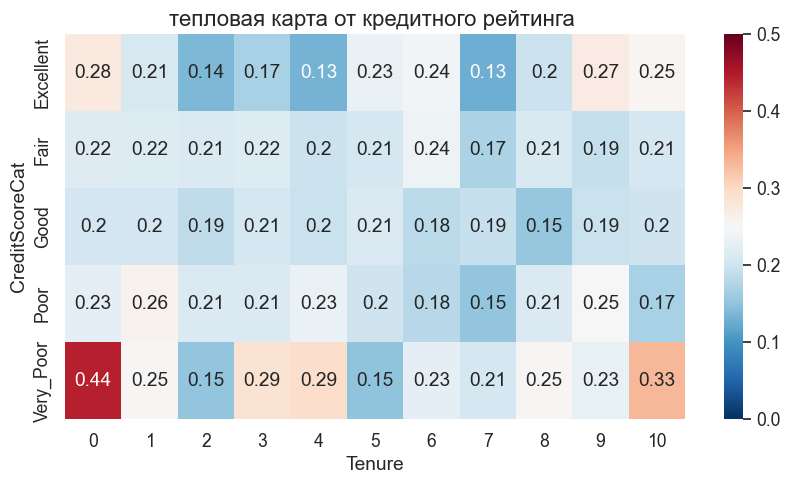

In [286]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

data111['CreditScoreCat'] = data111['CreditScore'].apply(get_credit_score_cat)
display(data111)
pivot_table = pd.pivot_table(data111, values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')
display(pivot_table)

# создание тепловой карты
sns.set(font_scale=1.15)
plt.figure(figsize=(10,5))
t = sns.heatmap(
    pivot_table,        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=0, vmax=0.5); # указывает начало цветовых кодов от -1 до 1.
t.set_title('тепловая карта от кредитного рейтинга ', fontsize=16)

Чаще всего уходили клиента с рейтингом "Very_Poor", которые пользовались услугами банка меньше года